In [6]:
!pip install -q tqdm --user
!pip install -q tensorflow-gpu --user
!pip install -q tensorflow_datasets --user
!pip install -q tensorflow_hub --user

import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.10.1 which is incompatible.
tensorflow 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorflow-serving-api 2.12.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
ERROR: pip's dependency resolver does not currently take into acc

ERROR:absl:module 'tensorflow_datasets.core' has no attribute 'utils'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/tensorflow_datasets/__init__.py", line 59, in <module>
    from tensorflow_datasets import audio
  File "/opt/conda/lib/python3.10/site-packages/tensorflow_datasets/audio/__init__.py", line 19, in <module>
    from tensorflow_datasets.audio.commonvoice import CommonVoice
  File "/opt/conda/lib/python3.10/site-packages/tensorflow_datasets/audio/commonvoice.py", line 27, in <module>
    import tensorflow_datasets.public_api as tfds
  File "/opt/conda/lib/python3.10/site-packages/tensorflow_datasets/public_api.py", line 57, in <module>
    deprecated = core.utils.docs.deprecated(deprecated)
AttributeError: module 'tensorflow_datasets.core' has no attribute 'utils'


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

2024-03-13 13:57:52.190256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 13:57:52.422802: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 13:57:53.772893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-13 13:57:53.773061: W tensorflow/strea

In [2]:
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info

test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

2024-03-13 13:58:03.723757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-13 13:58:03.782295: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-13 13:58:03.782391: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f3847cd22081): /proc/driver/nvidia/version does not exist
2024-03-13 13:58:03.911630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in 

In [4]:
import json

In [3]:
class_labels = dataset_info.features['label'].names

print("Class Labels:", class_labels)

Class Labels: ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow

In [5]:

label_to_number = {label: i for i, label in enumerate(class_labels)}


json_object = json.dumps(label_to_number, indent=2)


print(json_object)

{
  "pink primrose": 0,
  "hard-leaved pocket orchid": 1,
  "canterbury bells": 2,
  "sweet pea": 3,
  "english marigold": 4,
  "tiger lily": 5,
  "moon orchid": 6,
  "bird of paradise": 7,
  "monkshood": 8,
  "globe thistle": 9,
  "snapdragon": 10,
  "colt's foot": 11,
  "king protea": 12,
  "spear thistle": 13,
  "yellow iris": 14,
  "globe-flower": 15,
  "purple coneflower": 16,
  "peruvian lily": 17,
  "balloon flower": 18,
  "giant white arum lily": 19,
  "fire lily": 20,
  "pincushion flower": 21,
  "fritillary": 22,
  "red ginger": 23,
  "grape hyacinth": 24,
  "corn poppy": 25,
  "prince of wales feathers": 26,
  "stemless gentian": 27,
  "artichoke": 28,
  "sweet william": 29,
  "carnation": 30,
  "garden phlox": 31,
  "love in the mist": 32,
  "mexican aster": 33,
  "alpine sea holly": 34,
  "ruby-lipped cattleya": 35,
  "cape flower": 36,
  "great masterwort": 37,
  "siam tulip": 38,
  "lenten rose": 39,
  "barbeton daisy": 40,
  "daffodil": 41,
  "sword lily": 42,
  "poinse

In [6]:
num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))

Total Number of Training Images: 1020
Total Number of Validation Images: 1020
Total Number of Test Images: 6149 

Total Number of Classes: 102


In [19]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.cache().shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = test_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

In [10]:
from tensorflow.keras import layers

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))

feature_extractor.trainable = False

model = tf.keras.Sequential([
  data_augmentation,
  feature_extractor,
  layers.Dense(num_classes, activation='softmax')
])

In [20]:
base_learning_rate = 0.01
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

EPOCHS = 20

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

Epoch 1/20


32/32 [==============================] - 39s 1s/step - loss: 0.4039 - accuracy: 0.9137 - val_loss: 2.3471 - val_accuracy: 0.6833
Epoch 2/20
32/32 [==============================] - 32s 1s/step - loss: 0.2544 - accuracy: 0.9412 - val_loss: 2.4012 - val_accuracy: 0.7010
Epoch 3/20
32/32 [==============================] - 33s 1s/step - loss: 0.1880 - accuracy: 0.9598 - val_loss: 1.8916 - val_accuracy: 0.7382
Epoch 4/20
32/32 [==============================] - 32s 1s/step - loss: 0.1705 - accuracy: 0.9598 - val_loss: 1.8474 - val_accuracy: 0.7510
Epoch 5/20
32/32 [==============================] - 33s 1s/step - loss: 0.0917 - accuracy: 0.9735 - val_loss: 1.9422 - val_accuracy: 0.7382
Epoch 6/20
32/32 [==============================] - 32s 1s/step - loss: 0.1061 - accuracy: 0.9735 - val_loss: 1.7266 - val_accuracy: 0.7667
Epoch 7/20
32/32 [==============================] - 33s 1s/step - loss: 0.1426 - accuracy: 0.9647 - val_loss: 2.3421 - val_accuracy: 0.7029
Epoch 8/20
32/32 [=============

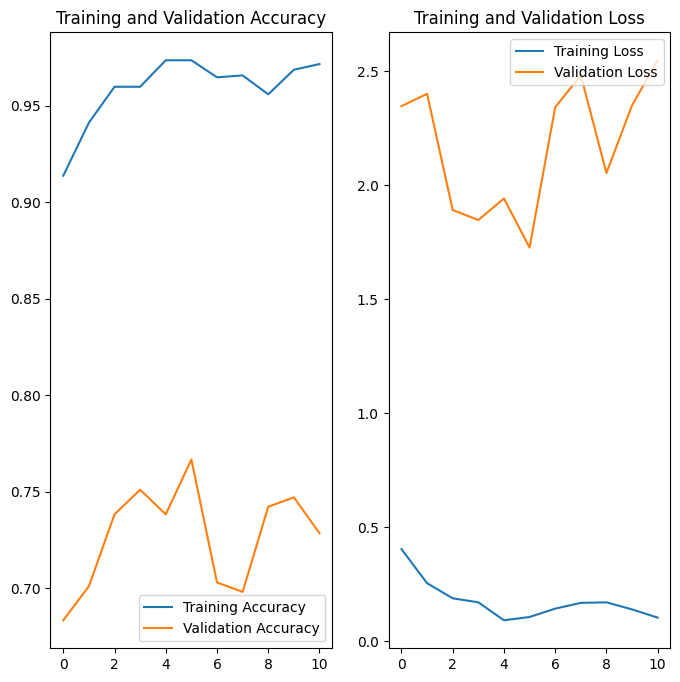

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
model.save('model_oxford/model_trained_valid4')

INFO:tensorflow:Assets written to: model_oxford/model_trained_valid4/assets


INFO:tensorflow:Assets written to: model_oxford/model_trained_valid4/assets


In [14]:
import pandas as pd

In [24]:
pd.DataFrame.from_dict(history.history).to_csv('model_oxford/history4.csv',index=False)

In [25]:
val_acc

[0.6833333373069763,
 0.7009803652763367,
 0.7382352948188782,
 0.7509803771972656,
 0.7382352948188782,
 0.7666666507720947,
 0.7029411792755127,
 0.6980392336845398,
 0.7421568632125854,
 0.7470588088035583,
 0.7284313440322876]

In [16]:
print('Is there a GPU Available:', tf.test.is_gpu_available())

Is there a GPU Available: False


In [25]:
results = model.evaluate(test_batches)
print('test loss, test acc:', results)

2024-03-06 17:02:37.322613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [2]
	 [[{{node Placeholder/_2}}]]
2024-03-06 17:02:37.324101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]


193/193 [==============================] - 118s 612ms/step - loss: 0.9034 - accuracy: 0.7783
test loss, test acc: [0.9033793807029724, 0.7783379554748535]


In [26]:
pd.DataFrame.from_dict(results).to_csv('model_oxford/results.csv',index=False)

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

input_shape = (224, 224, 3)
input_tensor = layers.Input(shape=input_shape, name='input_image')

preprocessed_input = preprocess_input(input_tensor)

output_tensor = model(preprocessed_input)

new_model = models.Model(inputs=input_tensor, outputs=output_tensor)

new_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 sequential (Sequential)     (None, 102)               2388646   
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
img_path = 'yellow_iris_test.png'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preprocessed_img_array = preprocess_input(img_array)

predictions = model.predict(preprocessed_img_array)

1/1 [==============================] - 1s 918ms/step


In [29]:
print(predictions)

[[2.3421548e-05 2.9396880e-01 8.4266567e-04 4.6117853e-05 1.2628675e-07
  1.0150637e-01 4.0123943e-02 9.6262479e-03 1.3668758e-05 2.6485376e-04
  1.2558392e-07 4.0789028e-03 3.2091256e-02 9.3260407e-03 2.3543229e-03
  3.5113533e-04 2.1231081e-04 4.7291154e-03 6.2613061e-04 1.0396502e-01
  5.2570633e-04 5.0068616e-07 7.7158916e-03 1.5647309e-04 5.9800065e-04
  1.1186926e-05 2.0647752e-04 2.6878188e-03 4.0711438e-05 2.1888088e-07
  1.4187474e-04 1.4129648e-06 6.6439854e-04 4.1899213e-07 2.8161533e-04
  2.6260877e-02 5.1218580e-05 6.6364811e-07 8.5941363e-05 3.5827038e-06
  2.8536492e-08 1.8691066e-04 1.0171374e-01 3.3784041e-04 9.3439297e-04
  1.8903629e-06 1.5098542e-05 8.1948674e-04 1.6855844e-06 1.3783165e-05
  6.6778308e-04 3.4285067e-06 5.9376697e-07 5.2502746e-04 1.6914855e-05
  3.1505822e-06 2.2308305e-02 5.4578677e-06 1.0232780e-04 1.7609057e-07
  2.3815828e-07 6.9690748e-07 3.6914869e-05 5.0891485e-05 8.9113349e-03
  1.9913479e-08 7.5321627e-04 8.7428629e-02 7.2201092e-06 8.4490

In [30]:
top5_indices = np.argsort(predictions[0])[::-1][:5]

In [31]:
print("Top 5 indices:", top5_indices)

Top 5 indices: [ 1 19 42  5 67]


In [36]:
top_values, top_indices = tf.math.top_k(predictions, 5)
print("These are the top propabilities",top_values.numpy()[0])
top_classes = [class_labels[value] for value in top_indices.cpu().numpy()[0]]
print('Of these top classes', top_classes)


These are the top propabilities [0.2939688  0.10396502 0.10171374 0.10150637 0.08742863]
Of these top classes ['hard-leaved pocket orchid', 'giant white arum lily', 'sword lily', 'tiger lily', 'bearded iris']


In [37]:
img_path = 'yellow_iris_test.png' 
img = image.load_img(img_path, target_size=(224, 224))

new_predictions = new_model.predict(preprocessed_img_array)

1/1 [==============================] - 1s 711ms/step


In [38]:
top_values, top_indices = tf.math.top_k(new_predictions, 5)
print("These are the top propabilities",top_values.numpy()[0])
top_classes = [class_labels[value] for value in top_indices.cpu().numpy()[0]]
print('Of these top classes', top_classes)


These are the top propabilities [0.14506388 0.08544603 0.06034816 0.05581151 0.05494335]
Of these top classes ['cyclamen', 'grape hyacinth', 'rose', 'gazania', 'trumpet creeper']


In [39]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()

result_batch = model.predict(image_batch)
new_result_batch = new_model.predict(image_batch)
new_result_batch.shape

2024-03-06 17:42:22.372656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2024-03-06 17:42:22.373756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 1s 627ms/step


(32, 102)

In [40]:
(abs(result_batch - new_result_batch)).max()

0.9980262

In [41]:
def process_image(img):
    image = np.squeeze(img)
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image

In [43]:
from PIL import Image

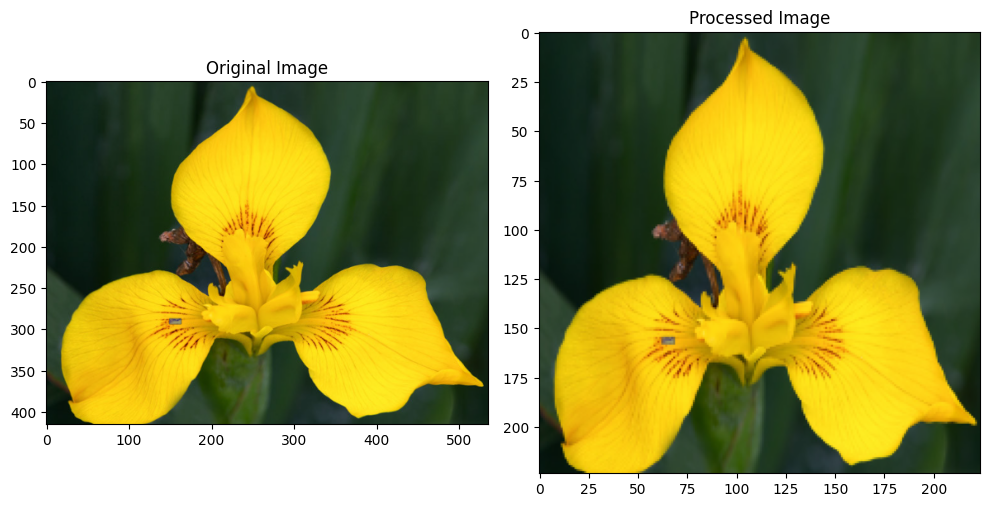

In [44]:
image_path = 'yellow_iris_test.png'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [45]:
def predict(image_path, model, top_k):
    im = Image.open(image_path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)
    prediction = model.predict(np.expand_dims(processed_test_image, axis=0))
    top_values, top_indices = tf.math.top_k(prediction, top_k)
    print("These are the top propabilities",top_values.numpy()[0])
    top_classes = [class_names[str(value)] for value in top_indices.cpu().numpy()[0]]
    print('Of these top classes', top_classes)
    return top_values.numpy()[0], top_classes

In [49]:
def predict(image_path, model, top_k):
    im = Image.open(image_path)
    
    rgb_im = im.convert('RGB')
    
    test_image = np.asarray(rgb_im)
    processed_test_image = process_image(test_image)
    
    prediction = model.predict(np.expand_dims(processed_test_image, axis=0))
    
    top_values, top_indices = tf.math.top_k(prediction, top_k)
    
    print("These are the top probabilities:", top_values.numpy()[0])
    
    top_classes = [class_labels[value] for value in top_indices.numpy()[0]]
    
    print('Of these top classes:', top_classes)
    
    return top_values.numpy()[0], top_classes

In [50]:
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)

1/1 [==============================] - 0s 49ms/step
These are the top probabilities: [0.4822012  0.12410511 0.07736501 0.05530383 0.04986769]
Of these top classes: ['californian poppy', 'bearded iris', 'hard-leaved pocket orchid', 'buttercup', 'yellow iris']
[0.4822012  0.12410511 0.07736501 0.05530383 0.04986769]
['californian poppy', 'bearded iris', 'hard-leaved pocket orchid', 'buttercup', 'yellow iris']


In [53]:
im = Image.open(image_path)
    
rgb_im = im.convert('RGB')
    
test_image = np.asarray(rgb_im)
prediction = new_model.predict(test_image)
top_values, top_indices = tf.math.top_k(prediction, top_k)
print("These are the top probabilities:", top_values.numpy()[0])  

top_classes = [class_labels[value] for value in top_indices.numpy()[0]]
print('Of these top classes:', top_classes)  
top_values.numpy()[0], top_classes

ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 535, 3)


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_oxford/model_oxford.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpg7yyxdnm/assets


INFO:tensorflow:Assets written to: /tmp/tmpg7yyxdnm/assets
2024-03-06 18:08:16.139971: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-03-06 18:08:16.140050: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-03-06 18:08:16.158390: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpg7yyxdnm
2024-03-06 18:08:16.174891: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-03-06 18:08:16.174961: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpg7yyxdnm
2024-03-06 18:08:16.250128: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-03-06 18:08:16.274583: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-03-06 18:08:16.950159: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [60]:
from tensorflow.lite.schema import model_metadata_pb2

model_meta = model_metadata_pb2.ModelMetadataT()
model_meta.name = "Oxford flowers model"
model_meta.description = "Identify 102 types of common flowers"

subgraph_meta = model_metadata_pb2.SubGraphMetadataT()
subgraph_meta.inputTensorNames = input_details
subgraph_meta.outputTensorNames = output_details

metadata_buf = model_meta.SerializeToString()
with open("model_oxford/metadata.tflite", "wb") as f:
    f.write(metadata_buf)

ModuleNotFoundError: No module named 'tensorflow.lite.schema'

In [56]:
input_details = model.input
output_details = model.output

print("Input tensor name:", input_details.name)
print("Output tensor name:", output_details.name)

Input tensor name: keras_layer_input
Output tensor name: dense/Softmax:0
